In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
import pandas as pd

In [3]:
import imblearn
print(imblearn.__version__)

0.8.1


In [4]:
df=pd.read_csv("../input/machine-predictive-maintenance-classification/predictive_maintenance.csv")

In [5]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [7]:
df.apply(lambda x: x.nunique())

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [8]:
df.iloc[:,-1].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

# Covering Memory Leak
 ### Can not use both Target and Failure Type at the same time. As both of them together will have Data leak. 


In [9]:
df.drop(df.columns[:2],axis=1,inplace=True)

In [10]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


# EDA

In [11]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.style.use('ggplot')

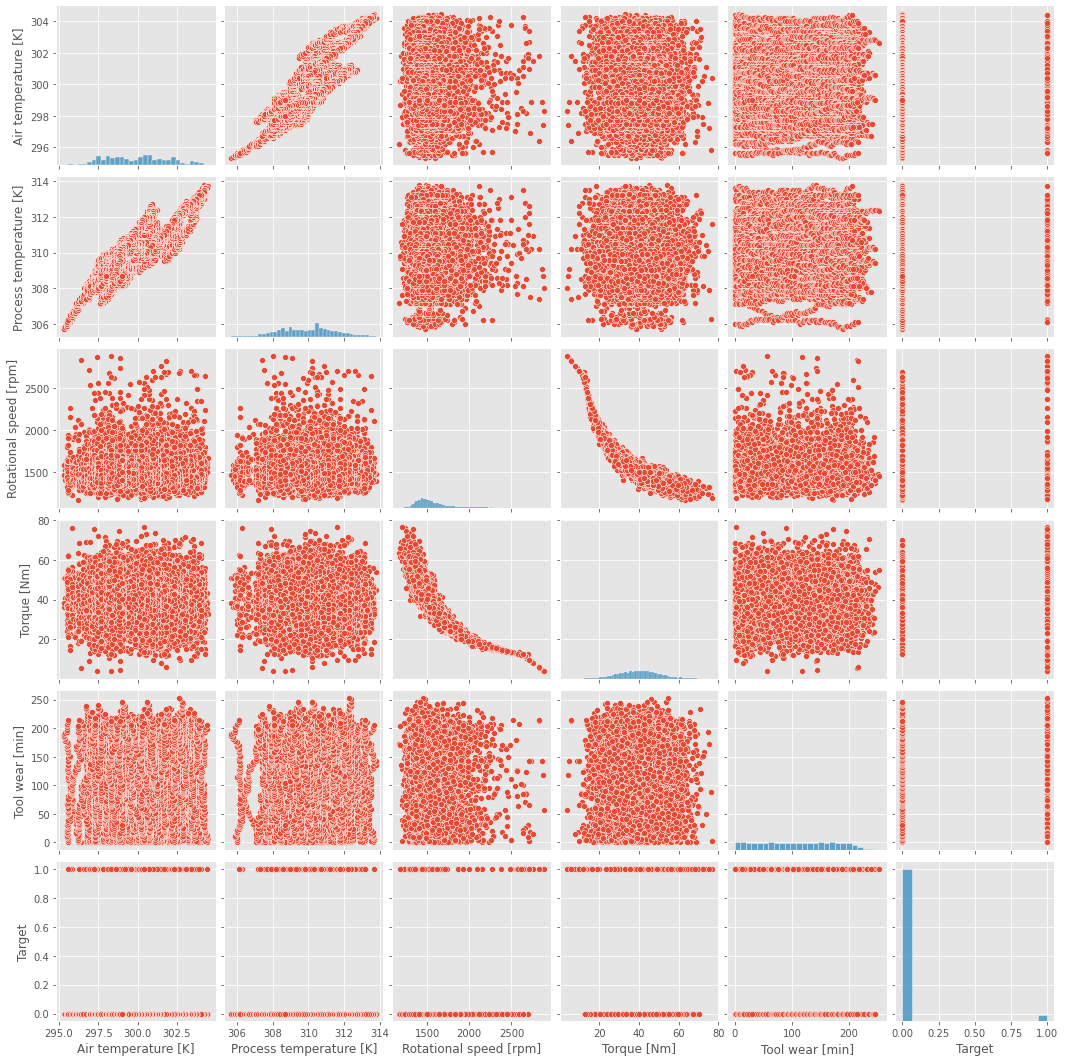

In [12]:
sns.pairplot(df)

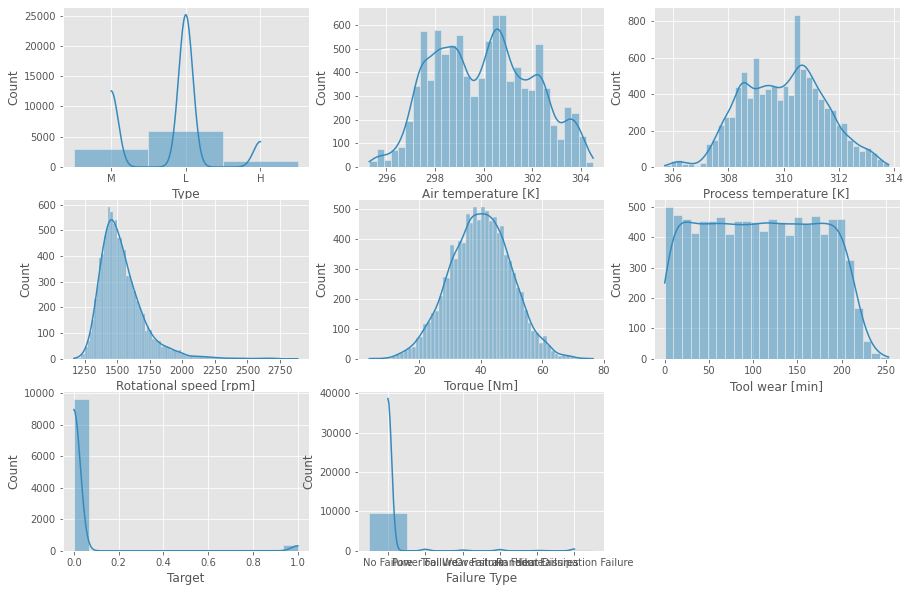

In [13]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde=True)

In [14]:
from sklearn .preprocessing import LabelEncoder
encode=LabelEncoder()

In [15]:
df.loc[:,df.columns[-1]]=encode.fit_transform(df.loc[:,df.columns[-1]])

In [16]:
encode.classes_

array(['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure',
       'Power Failure', 'Random Failures', 'Tool Wear Failure'],
      dtype=object)

In [17]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,1
1,L,298.2,308.7,1408,46.3,3,0,1
2,L,298.1,308.5,1498,49.4,5,0,1
3,L,298.2,308.6,1433,39.5,7,0,1
4,L,298.2,308.7,1408,40.0,9,0,1


In [18]:
from sklearn.model_selection import train_test_split
X_train , X_test = train_test_split(df,test_size = 0.3)

In [19]:
df = X_train

In [20]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
7364,L,299.5,309.9,1402,51.7,58,0,1
966,M,295.8,306.5,1641,32.2,101,0,1
4163,L,302.1,310.5,1696,30.9,107,0,1
7791,L,300.1,311.4,1418,47.7,73,0,1
1032,L,296.3,307.4,1648,34.0,60,0,1


## Need to min max Scaler on Roatation speed and Standard scaller on all
- ### Use MinMaxScaler as your default
- ### Use RobustScaler if you have outliers and can handle a larger range
- ### Use StandardScaler if you need normalized features
- ### Use Normalizer sparingly - it normalizes rows, not columns

<AxesSubplot:>

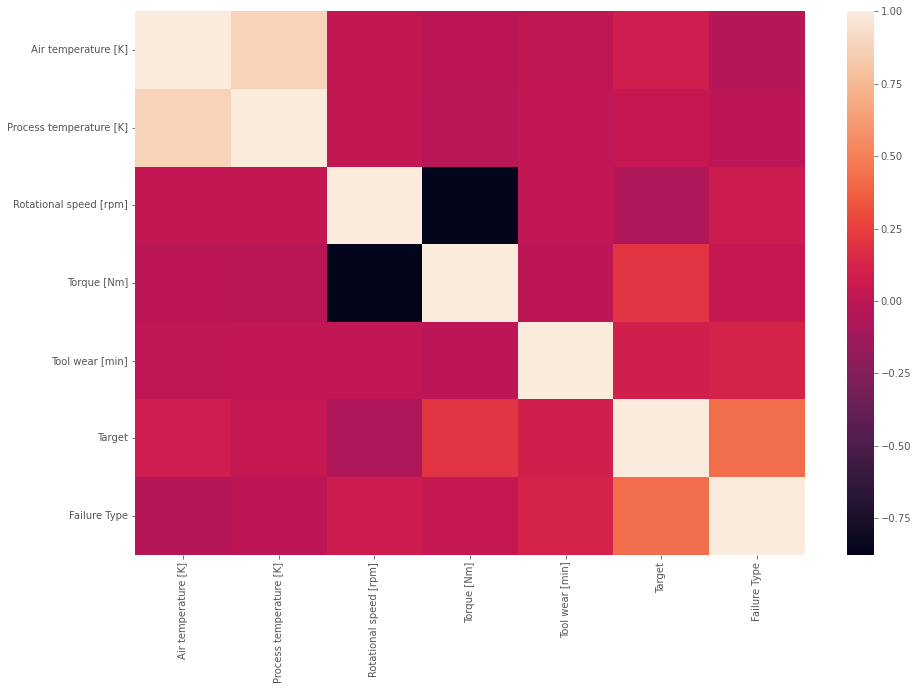

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

In [22]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,299.993829,309.994986,1538.375429,39.983243,108.665000,0.032714,1.034143
std,2.002294,1.482274,177.351144,9.951903,63.254697,0.177900,0.363902
min,295.300000,305.700000,1183.000000,4.200000,0.000000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.100000,54.000000,0.000000,1.000000
50%,300.100000,310.100000,1504.000000,40.100000,109.000000,0.000000,1.000000
75%,301.500000,311.000000,1612.000000,46.800000,162.000000,0.000000,1.000000
max,304.500000,313.800000,2874.000000,76.600000,251.000000,1.000000,5.000000


In [23]:
df.drop(df.columns[-2],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
7364,L,299.5,309.9,1402,51.7,58,1
966,M,295.8,306.5,1641,32.2,101,1
4163,L,302.1,310.5,1696,30.9,107,1
7791,L,300.1,311.4,1418,47.7,73,1
1032,L,296.3,307.4,1648,34.0,60,1


In [25]:
df[df.columns[-1]].value_counts()

1    6763
0      83
3      58
2      55
5      28
4      13
Name: Failure Type, dtype: int64

In [26]:
df.Type.value_counts()

L    4223
M    2056
H     721
Name: Type, dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
df=pd.get_dummies(df,drop_first=True)

In [29]:
X_test = pd.get_dummies(X_test,drop_first=True)

In [30]:
X_test.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type_L,Type_M
4581,303.0,311.2,1601,32.9,69,0,1,1,0
1178,297.3,308.5,1398,60.4,12,0,1,1,0
3183,300.1,309.3,1616,32.0,199,0,1,1,0
3283,301.2,309.9,1449,45.5,23,0,1,1,0
5512,302.8,312.2,1682,30.9,58,0,1,1,0


In [31]:
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [32]:
df=df.sample(frac=1).reset_index(drop=True)

In [33]:
df.columns=df.columns.astype("str")

In [34]:
col_name=df.columns.to_list()

In [35]:
col_name

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Failure Type',
 'Type_L',
 'Type_M']

In [36]:
target_col=col_name.pop(-3)

In [37]:
feature_col=col_name

In [38]:
target_col

'Failure Type'

In [39]:
feature_col

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Type_L',
 'Type_M']

In [40]:
y=df["Failure Type"].values

# Implementing Oversampling Due to Data Imbalance

In [41]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [42]:
df_train=df.drop(df.columns[-3],axis=1)

In [43]:
df_train_val=df_train.values

In [44]:
smk=SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(df_train_val,y)

In [45]:
X_res.shape,y_res.shape

((40540, 7), (40540,))

In [46]:
print(f"Orignal Dataset Shape {Counter(y)}")
print(f"Resampled Dataset Shape {Counter(y_res)}")

Orignal Dataset Shape Counter({1: 6763, 0: 83, 3: 58, 2: 55, 5: 28, 4: 13})
Resampled Dataset Shape Counter({2: 6763, 5: 6761, 0: 6760, 3: 6758, 4: 6754, 1: 6744})


In [47]:
df_new=pd.concat([pd.DataFrame(X_res),pd.DataFrame(y_res)],axis=1)

In [48]:
df_new.head()

,0,1,2,3,4,5,6,0
0,298.0,308.7,1494.0,42.6,96.0,0.0,1.0,1
1,301.4,310.1,1937.0,21.8,205.0,1.0,0.0,1
2,295.4,305.8,1526.0,38.2,181.0,0.0,1.0,1
3,298.2,307.6,1318.0,55.7,0.0,0.0,0.0,1
4,302.7,312.4,1433.0,44.2,17.0,1.0,0.0,1


In [49]:
col_new=df_train.columns
col_new=col_new.to_list()
col_new.append(target_col)
df_new.columns=col_new
df_new.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_L,Type_M,Failure Type
0,298.0,308.7,1494.0,42.6,96.0,0.0,1.0,1
1,301.4,310.1,1937.0,21.8,205.0,1.0,0.0,1
2,295.4,305.8,1526.0,38.2,181.0,0.0,1.0,1
3,298.2,307.6,1318.0,55.7,0.0,0.0,0.0,1
4,302.7,312.4,1433.0,44.2,17.0,1.0,0.0,1


In [50]:
#import plotly.plotly as py
! pip install chart-studio
from chart_studio import plotly

     |████████████████████████████████| 64 kB 287 kB/s 


# ❔ Checking for outliers

In [51]:
from plotly import __version__ 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

<AxesSubplot:xlabel='Failure Type', ylabel='Air temperature [K]'>

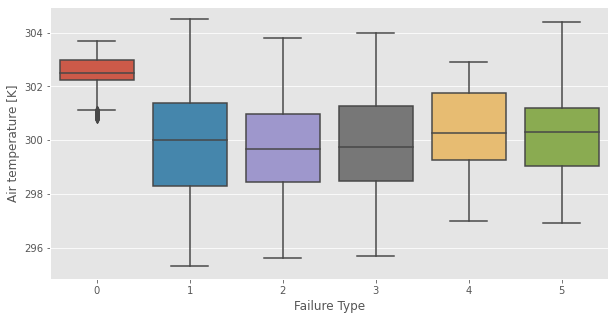

In [52]:
## Checking in Air Temp
mpl_fig = plt.figure(figsize=(10,5))

sns.boxplot(y=feature_col[0],x="Failure Type",data=df_new)

<AxesSubplot:xlabel='Failure Type', ylabel='Process temperature [K]'>

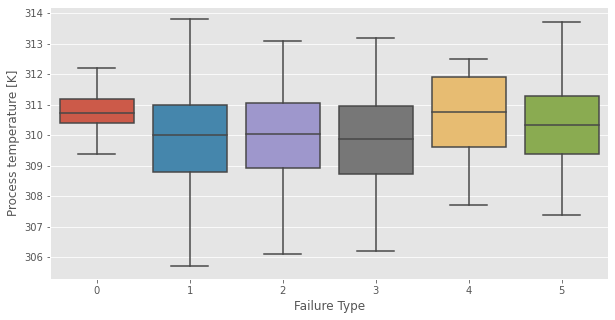

In [53]:
## Checking in Process Temp
plt.figure(figsize=(10,5))
sns.boxplot(y=feature_col[1],x="Failure Type",data=df_new)

<AxesSubplot:xlabel='Failure Type', ylabel='Rotational speed [rpm]'>

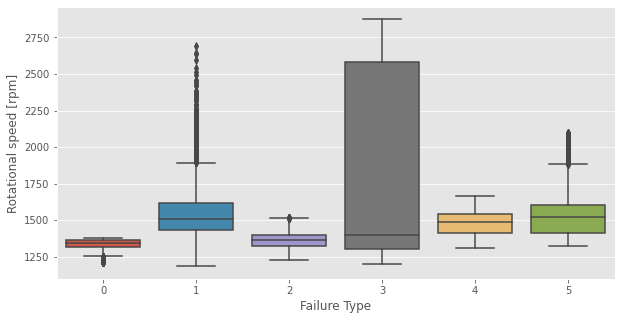

In [54]:
## Checking in Rotational Speed

plt.figure(figsize=(10,5))
sns.boxplot(y=feature_col[2],x="Failure Type",data=df_new)

<AxesSubplot:xlabel='Failure Type', ylabel='Torque [Nm]'>

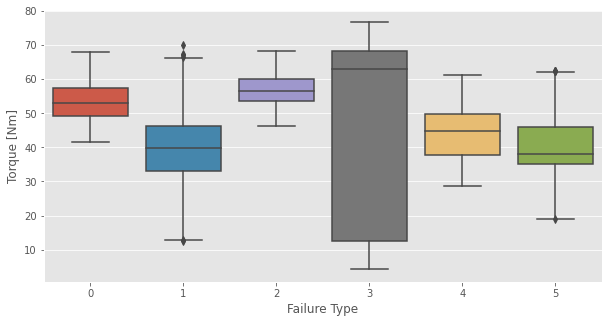

In [55]:
## Checking in Torque
plt.figure(figsize=(10,5))
sns.boxplot(y=feature_col[3],x="Failure Type",data=df_new)

<AxesSubplot:xlabel='Failure Type', ylabel='Tool wear [min]'>

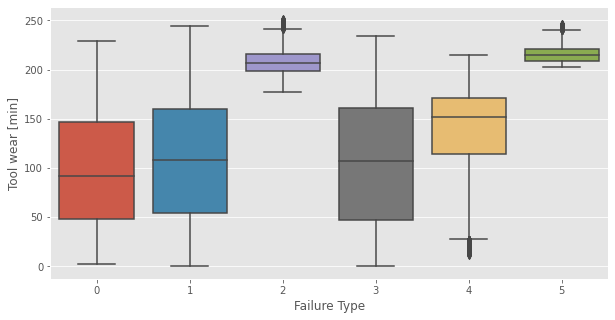

In [56]:
## Checking in Tool wear
plt.figure(figsize=(10,5))
sns.boxplot(y=feature_col[4],x="Failure Type",data=df_new)

<AxesSubplot:xlabel='Failure Type', ylabel='count'>

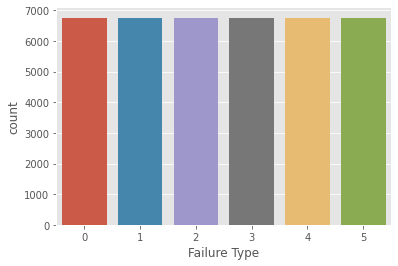

In [57]:
sns.countplot(x="Failure Type",data=df_new)

In [58]:
# As the data here is imbalanced we need to use 
y_res

array([1, 1, 1, ..., 5, 5, 5])

# Using Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
import warnings
warnings.filterwarnings('ignore')
acc_log=[]

In [60]:
# ## Building a Classification model using 
# kf=model_selection.StratifiedKFold(n_splits=5)
# for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
#     X_train=df_new.loc[trn_,feature_col]
#     y_train=df_new.loc[trn_,target_col]
    
#     X_valid=df_new.loc[val_,feature_col]
#     y_valid=df_new.loc[val_,target_col]
    
#     ro_scaler=RobustScaler()
#     X_train=ro_scaler.fit_transform(X_train)
#     X_valid=ro_scaler.transform(X_valid)
    
#     clf=LogisticRegression()
#     clf.fit(X_train,y_train)
#     y_pred=clf.predict(X_valid)
#     print(f"The fold is : {fold} : ")
#     print(classification_report(y_valid,y_pred))
#     acc=roc_auc_score(y_valid,y_pred)
#     acc_log.append(acc)
#     print(f"The accuracy for {fold} : {acc}")
#     pass
    

# Using Naive Bayers

In [61]:
X_test[target_col].values

array([1, 1, 1, ..., 1, 1, 1])

In [62]:
X_test.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type_L,Type_M
4581,303.0,311.2,1601,32.9,69,0,1,1,0
1178,297.3,308.5,1398,60.4,12,0,1,1,0
3183,300.1,309.3,1616,32.0,199,0,1,1,0
3283,301.2,309.9,1449,45.5,23,0,1,1,0
5512,302.8,312.2,1682,30.9,58,0,1,1,0


In [63]:
X_test[target_col].values

array([1, 1, 1, ..., 1, 1, 1])

In [64]:
from sklearn.naive_bayes import GaussianNB
acc_Gauss=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    
    clf=GaussianNB()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    #print(X_train[target_col].values)
    print(y_pred)
    print(classification_report(X_test[target_col].values,y_pred))
#     acc=roc_auc_score(y_valid,y_pred,multi_class="ovo")
#     acc_Gauss.append(acc)
#     print(f"The accuracy for {fold} : {acc}")
    
    pass

The fold is : 0 : 
[4 3 5 ... 4 4 1]
              precision    recall  f1-score   support

           0       0.22      0.86      0.35        29
           1       1.00      0.49      0.66      2889
           2       0.23      0.96      0.37        23
           3       0.12      0.73      0.21        37
           4       0.00      0.60      0.01         5
           5       0.04      0.47      0.08        17

    accuracy                           0.50      3000
   macro avg       0.27      0.69      0.28      3000
weighted avg       0.97      0.50      0.65      3000

The fold is : 1 : 
[4 3 5 ... 4 4 1]
              precision    recall  f1-score   support

           0       0.23      0.90      0.36        29
           1       1.00      0.50      0.66      2889
           2       0.23      0.96      0.37        23
           3       0.12      0.73      0.21        37
           4       0.00      0.60      0.01         5
           5       0.04      0.47      0.08        17

   

# Using SVM(Support Vector Machines)
### We need to choose the best Kernel according to our need.

- #### The linear kernel is mostly preferred for text classification problems as it performs well for large datasets. 
- #### Gaussian kernels tend to give good results when there is no additional information regarding data that is not available.
- #### Rbf kernel is also a kind of Gaussian kernel which projects the high dimensional data and then searches a linear separation for it.
- #### Polynomial kernels give good results for problems where all the training data is normalized. 


In [65]:
from sklearn.svm import SVC
acc_svm=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    
    clf=SVC(kernel="linear")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
#     acc=accuracy_score(y_valid,y_pred)
#     acc_svm.append(acc)
#     print(f"The accuracy for {fold} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.27      1.00      0.43        29
           1       1.00      0.70      0.82      2889
           2       0.55      0.96      0.70        23
           3       0.56      0.95      0.70        37
           4       0.00      0.40      0.01         5
           5       0.04      0.35      0.07        17

    accuracy                           0.70      3000
   macro avg       0.40      0.73      0.45      3000
weighted avg       0.97      0.70      0.81      3000

The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.27      1.00      0.42        29
           1       1.00      0.70      0.82      2889
           2       0.52      0.96      0.68        23
           3       0.55      0.95      0.69        37
           4       0.00      0.40      0.01         5
           5       0.04      0.35      0.08        17

    accuracy                           

In [66]:
# from sklearn.svm import SVC
# acc_svm_sig=[]
# kf=model_selection.StratifiedKFold(n_splits=5)
# for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
#     X_train=df_new.loc[trn_,feature_col]
#     y_train=df_new.loc[trn_,target_col]
    
#     X_valid=df_new.loc[val_,feature_col]
#     y_valid=df_new.loc[val_,target_col]
    
#     ro_scaler=RobustScaler()
#     X_train=ro_scaler.fit_transform(X_train)
#     X_valid=ro_scaler.transform(X_valid)
    
#     clf=SVC(kernel="sigmoid")
#     clf.fit(X_train,y_train)
#     y_pred=clf.predict(X_valid)
#     print(f"The fold is : {fold} : ")
#     print(classification_report(y_valid,y_pred))
# #     acc=accuracy_score(y_valid,y_pred)
# #     acc_svm_sig.append(acc)
# #     print(f"The accuracy for {fold} : {acc}")

In [67]:
from sklearn.svm import SVC
acc_svm_rbf=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    clf=SVC(kernel="rbf")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
#     acc=accuracy_score(y_valid,y_pred)
#     acc_svm_rbf.append(acc)
#     print(f"The accuracy for {fold} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.32      1.00      0.49        29
           1       1.00      0.83      0.91      2889
           2       0.50      0.91      0.65        23
           3       0.65      0.86      0.74        37
           4       0.01      0.40      0.01         5
           5       0.07      0.53      0.12        17

    accuracy                           0.83      3000
   macro avg       0.42      0.76      0.49      3000
weighted avg       0.97      0.83      0.89      3000

The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.31      1.00      0.47        29
           1       0.99      0.83      0.90      2889
           2       0.50      0.91      0.65        23
           3       0.67      0.86      0.75        37
           4       0.01      0.40      0.01         5
           5       0.07      0.53      0.12        17

    accuracy                           

In [68]:
from sklearn.svm import SVC
acc_svm_poly=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    clf=SVC(kernel="poly")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
#     acc=accuracy_score(y_valid,y_pred)
#     acc_svm_poly.append(acc)
#     print(f"The accuracy for {fold} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.17      0.72      0.27        29
           1       0.99      0.69      0.81      2889
           2       0.10      0.96      0.18        23
           3       0.65      0.70      0.68        37
           4       0.00      0.40      0.01         5
           5       0.04      0.29      0.07        17

    accuracy                           0.69      3000
   macro avg       0.33      0.63      0.34      3000
weighted avg       0.97      0.69      0.80      3000

The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.16      0.69      0.26        29
           1       0.99      0.69      0.81      2889
           2       0.10      0.96      0.18        23
           3       0.67      0.70      0.68        37
           4       0.00      0.40      0.01         5
           5       0.04      0.29      0.08        17

    accuracy                           

# Using  KNN
## The optimal K value usually found is the square root of N, where N is the total number of samples.

In [69]:
from sklearn.neighbors import KNeighborsClassifier
acc_KNN=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    clf=KNeighborsClassifier(n_neighbors=4)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
#     acc=accuracy_score(y_valid,y_pred)
#     acc_KNN.append(acc)
#     print(f"The accuracy for {fold} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.35      0.86      0.50        29
           1       0.99      0.93      0.96      2889
           2       0.46      0.96      0.62        23
           3       0.59      0.73      0.65        37
           4       0.02      0.20      0.03         5
           5       0.06      0.24      0.10        17

    accuracy                           0.92      3000
   macro avg       0.41      0.65      0.48      3000
weighted avg       0.97      0.92      0.94      3000

The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.33      0.83      0.47        29
           1       0.99      0.92      0.96      2889
           2       0.47      0.96      0.63        23
           3       0.58      0.76      0.66        37
           4       0.01      0.20      0.03         5
           5       0.07      0.24      0.10        17

    accuracy                           

# 🌲 Using Decission tree Classifier 

In [70]:
from sklearn.tree import DecisionTreeClassifier
acc_Dtree=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    clf=DecisionTreeClassifier(criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
#     acc=accuracy_score(y_valid,y_pred)
#     acc_Dtree.append(acc)
#     print(f"The accuracy for {fold} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.60      0.72      0.66        29
           1       0.99      0.97      0.98      2889
           2       0.70      0.83      0.76        23
           3       0.85      0.76      0.80        37
           4       0.02      0.20      0.04         5
           5       0.10      0.18      0.13        17

    accuracy                           0.96      3000
   macro avg       0.54      0.61      0.56      3000
weighted avg       0.97      0.96      0.96      3000

The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.55      0.72      0.63        29
           1       0.99      0.96      0.98      2889
           2       0.59      0.83      0.69        23
           3       0.84      0.84      0.84        37
           4       0.02      0.20      0.03         5
           5       0.13      0.18      0.15        17

    accuracy                           

In [71]:
# import time
# while True:
#     print("5")
#     time.sleep(60)

# 🚄 Using Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier
acc_RandF=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    clf=RandomForestClassifier(n_estimators=55,criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
#     acc=accuracy_score(y_valid,y_pred)
#     acc_RandF.append(acc)
#     print(f"The accuracy for {fold} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        29
           1       0.99      0.98      0.98      2889
           2       0.69      0.96      0.80        23
           3       0.80      0.86      0.83        37
           4       0.00      0.00      0.00         5
           5       0.10      0.12      0.11        17

    accuracy                           0.97      3000
   macro avg       0.55      0.63      0.58      3000
weighted avg       0.98      0.97      0.97      3000

The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.99      0.98      0.98      2889
           2       0.79      0.96      0.86        23
           3       0.76      0.86      0.81        37
           4       0.00      0.00      0.00         5
           5       0.06      0.06      0.06        17

    accuracy                           

# 🚄 Using XGBoost

In [73]:
class_failure=encode.classes_

In [74]:
class_failure

array(['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure',
       'Power Failure', 'Random Failures', 'Tool Wear Failure'],
      dtype=object)

In [75]:
# Checking the best accuracy in K-SVM using which Kernel;
fold_list=["Fold 1","Fold 2","Fold 3","Fold 4","Fold 5"]


In [76]:
from xgboost import XGBClassifier
acc_XGB=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_new,y=y_res)):
    
    X_train=df_new.loc[trn_,feature_col]
    y_train=df_new.loc[trn_,target_col]
    
    X_valid=df_new.loc[val_,feature_col]
    y_valid=df_new.loc[val_,target_col]
    
    ro_scaler=RobustScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    x_test_split=ro_scaler.transform(X_test[feature_col])
    clf=XGBClassifier()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(x_test_split)
    print(f"The fold is : {fold} : ")
    print(classification_report(X_test[target_col].values,y_pred))
#     acc=accuracy_score(y_valid,y_pred)
#     acc_XGB.append(acc)
#     print(f"The accuracy for {fold} : {acc}")

[16:21:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.99      0.98      0.99      2889
           2       0.85      0.96      0.90        23
           3       0.94      0.89      0.92        37
           4       0.00      0.00      0.00         5
           5       0.05      0.06      0.06        17

    accuracy                           0.97      3000
   macro avg       0.62      0.64      0.63      3000
weighted avg       0.98      0.97      0.98      3000

[16:21:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Ex

In [77]:
import pickle
with open("XG_boost_pkl","wb") as files:
    pickle.dump(clf,files)


# 🔚 Summary
### As we can see from the 97% AUC that we obtained using Random Forest as well as XGBoost

# Please Upvote If You Felt this was Helpfull
<img src="https://media.giphy.com/media/1BFEEIo4h1BuTH8eqP/giphy.gif">

In [78]:
# # load saved model
# with open('model_pkl' , 'rb') as f:
#     lr = pickle.load(f)